In [16]:
import numpy as np
import cvxpy as cp
from numpy import linalg as LA
from basis_generator import rand_moment
import matplotlib.pyplot as plt

In [52]:
def basis_gs(dim, num_obs, len_seq, num_out, remove_last):

    flag = False
    X_basis = []
    Norm = []

    X = rand_moment(dim,
                    num_obs,
                    len_seq,
                    num_out,
                    [len_seq],
                    remove_last)

    X = X/LA.norm(X)
    X_basis.append(X)
    Norm.append(LA.norm(X))

    while flag==False:

        X = rand_moment(dim,
                    num_obs,
                    len_seq,
                    num_out,
                    [len_seq],
                    remove_last)

        for k in range(len(X_basis)):
            X -= X_basis[k]*np.sum(X_basis[k]*np.conjugate(X))
        
        Norm.append(LA.norm(X))
        if Norm[-1]/Norm[-2] < 1e-10:
            print("Nul matrix found")
            print("Number of LI moment matrices: ", len(X_basis))
            flag=True
        else:
            X = X/LA.norm(X)
            X_basis.append(X)

    return X_basis, Norm

In [57]:
# Scenario
num_obs = 3
len_seq = 2
num_out = 2

In [58]:
dim = 2
X2, N2 = basis_gs(dim, num_obs, len_seq, num_out, True)

Nul matrix found
Number of LI moment matrices:  35


In [59]:
dim = 3
X3, N3 = basis_gs(dim, num_obs, len_seq, num_out, True)

Nul matrix found
Number of LI moment matrices:  46


In [60]:
dim = 4
X4, N4 = basis_gs(dim, num_obs, len_seq, num_out, True)

Nul matrix found
Number of LI moment matrices:  46


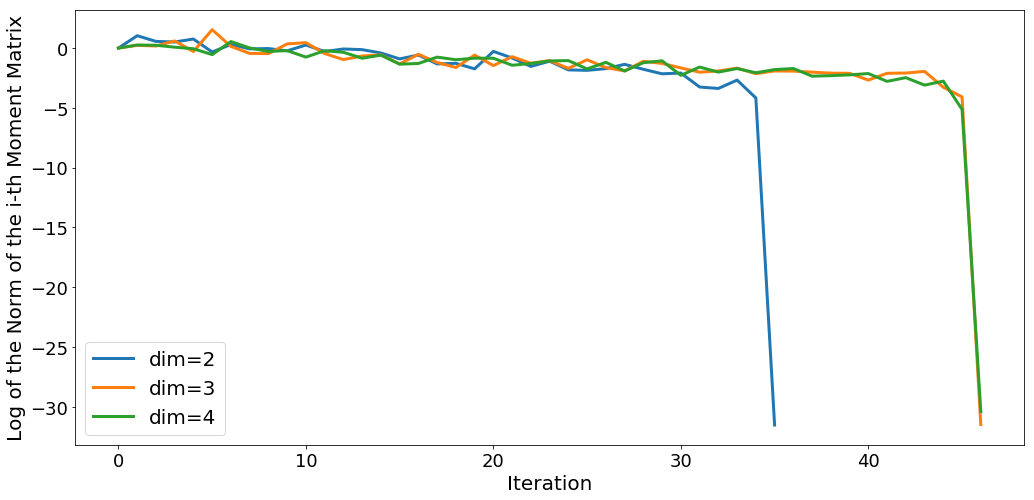

In [61]:
fig = plt.figure(figsize=(17, 8))

plt.plot(np.log(N2), linewidth = 3, zorder=1, label="dim=2")
plt.plot(np.log(N3), linewidth = 3, zorder=1, label="dim=3")
plt.plot(np.log(N4), linewidth = 3, zorder=1, label="dim=4")

plt.legend(fontsize=20)
plt.ylabel('Log of the Norm of the i-th Moment Matrix', fontsize=20)
plt.xlabel('Iteration', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
plt.show()

In [80]:
dim = 5
num_obs = 3
len_seq = 2
num_out = 3
remove_last = True

In [81]:
flag = False
X_basis = []
Norm = []

X = rand_moment(dim,
                num_obs,
                len_seq,
                num_out,
                [len_seq],
                remove_last)

X = X/LA.norm(X)
X_basis.append(X)
Norm.append(LA.norm(X))

In [104]:
for __ in range(100):

    X = rand_moment(dim,
                num_obs,
                len_seq,
                num_out,
                [len_seq],
                remove_last)

    for k in range(len(X_basis)):
        X -= X_basis[k]*np.sum(X_basis[k]*np.conjugate(X))

    Norm.append(LA.norm(X))

    X = X/LA.norm(X)
    X_basis.append(X)

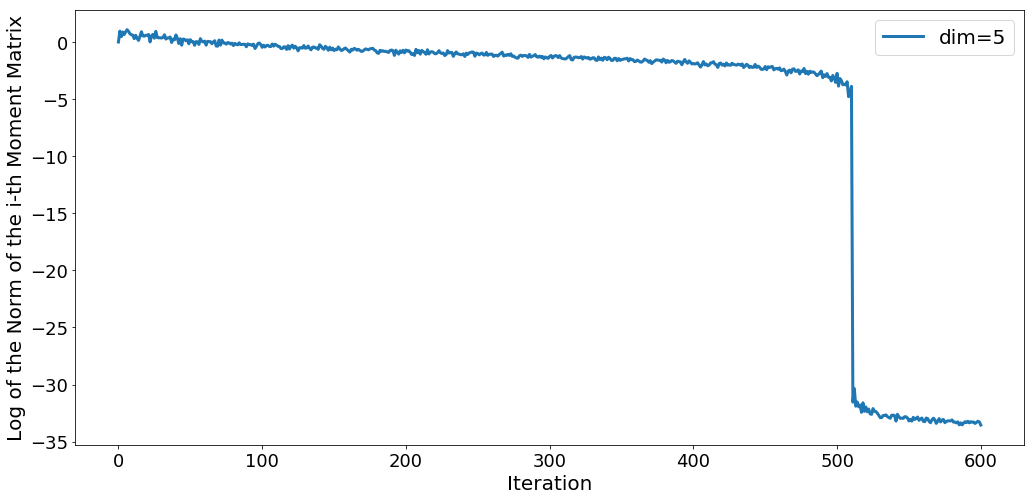

In [105]:
fig = plt.figure(figsize=(17, 8))

plt.plot(np.log(Norm), linewidth = 3, zorder=1, label="dim=5")

plt.legend(fontsize=20)
plt.ylabel('Log of the Norm of the i-th Moment Matrix', fontsize=20)
plt.xlabel('Iteration', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
plt.show()